In [1]:
%ls

'2,3peak mix.ipynb'                    Untitled4.ipynb
'5peak 3 para when it worksss.ipynb'   Untitled5.ipynb
'Fitting_with_noise (1).ipynb'         amp.csv
 ITO_O1s_bg.txt                        center.csv
 ITO_O1s_exp.txt                       graph.csv
 ITO_O1s_fitting.txt                   labels.png
 ITO_O1s_p1.txt                        model.png
 ITO_O1s_p2.txt                        model_shapes.png
 ITO_O1s_p3.txt                        peak_number.csv
 P3HT_S2p_bg.txt                       width.csv
 P3HT_S2p_exp.txt                     '논문 수정.ipynb'
 P3HT_S2p_fitting.txt                 '데이터 얻기.ipynb'
 P3HT_S2p_p1.txt                      '저장된 데이터로 학습하기.ipynb'
 P3HT_S2p_p2.txt                      '저장된 데이터로 학습하기2.ipynb'
 PeakDetection.ipynb                  '저장된 데이터로 학습하기3.ipynb'
 Untitled.ipynb                       '저장된 데이터로 학습하기4.ipynb'
 Untitled1.ipynb                      '저장된 데이터로 학습하기5.ipynb'
 Untitled2.ipynb                      '저장된 데이터로 학습하기6.ipynb'
 Untitled3.ipyn

In [2]:
import pandas as pd
import numpy as np

In [3]:
graph = pd.read_csv('graph.csv').values[:,1:]
center= pd.read_csv('center.csv').values[:,1:]
width= pd.read_csv('width.csv').values[:,1:]
amp= pd.read_csv('amp.csv').values[:,1:]
peak_number= pd.read_csv('peak_number.csv').values[:,1:]

In [4]:
peak_number=peak_number.reshape(2000000,)

In [5]:
print(center[0:10])
print(width[0:10])
print(amp[0:10])
print(peak_number[0:10])
print(center.shape)
print(width.shape)
print(amp.shape)
print(peak_number.shape)
print(graph.shape)
print(graph)

[[ 0.          6.08688456 11.0810396 ]
 [ 5.07493349  8.25999368 11.36195096]
 [ 0.          2.67516221 10.60419171]
 [ 0.          5.54053864 12.23836258]
 [ 0.          4.08422309  7.21849474]
 [ 0.          7.30192691 12.34014272]
 [ 0.          2.54016398  5.16493207]
 [ 0.          4.67819908  6.09299318]
 [ 4.90655934  5.13202252 10.34134357]
 [ 0.          5.36008602  5.98285268]]
[[0.         1.24062404 0.95374601]
 [0.60456503 0.35785198 1.1738216 ]
 [0.         1.17339162 1.12952083]
 [0.         0.81456259 0.81987822]
 [0.         0.81681444 1.70560007]
 [0.         0.32207246 0.75414831]
 [0.         0.30486538 1.895045  ]
 [0.         0.59293989 0.4647601 ]
 [1.46428848 1.12931752 1.8841104 ]
 [0.         1.00584571 1.33599321]]
[[0.         0.21158879 0.18180892]
 [0.11125957 0.85593768 0.31159992]
 [0.         0.59012228 0.71652582]
 [0.         1.00856931 0.70388527]
 [0.         0.94976759 0.16667863]
 [0.         0.43501787 0.93207997]
 [0.         0.8393851  0.570734

In [6]:
import matplotlib.pyplot as plt
x = np.linspace(0, 15, 401) 
def y(a,b,c,x):
    beta = 5.09791537e-01
    gamma = 4.41140472e-01
    y = c * ( (0.7*np.exp(-np.log(2)*(x - a)**2 / (beta * b)**2)) + (0.3/(1 + (x - a)**2 / (gamma * b)**2)))
#     y = c*(b**2)/((x-a)**2+b**2)
    return y

<ipython-input-6-69a298250a73>:6: RuntimeWarning: divide by zero encountered in true_divide
  y = c * ( (0.7*np.exp(-np.log(2)*(x - a)**2 / (beta * b)**2)) + (0.3/(1 + (x - a)**2 / (gamma * b)**2)))
<ipython-input-6-69a298250a73>:6: RuntimeWarning: invalid value encountered in true_divide
  y = c * ( (0.7*np.exp(-np.log(2)*(x - a)**2 / (beta * b)**2)) + (0.3/(1 + (x - a)**2 / (gamma * b)**2)))
<ipython-input-6-69a298250a73>:6: RuntimeWarning: divide by zero encountered in true_divide
  y = c * ( (0.7*np.exp(-np.log(2)*(x - a)**2 / (beta * b)**2)) + (0.3/(1 + (x - a)**2 / (gamma * b)**2)))
<ipython-input-6-69a298250a73>:6: RuntimeWarning: invalid value encountered in true_divide
  y = c * ( (0.7*np.exp(-np.log(2)*(x - a)**2 / (beta * b)**2)) + (0.3/(1 + (x - a)**2 / (gamma * b)**2)))
<ipython-input-6-69a298250a73>:6: RuntimeWarning: divide by zero encountered in true_divide
  y = c * ( (0.7*np.exp(-np.log(2)*(x - a)**2 / (beta * b)**2)) + (0.3/(1 + (x - a)**2 / (gamma * b)**2)))
<ipytho

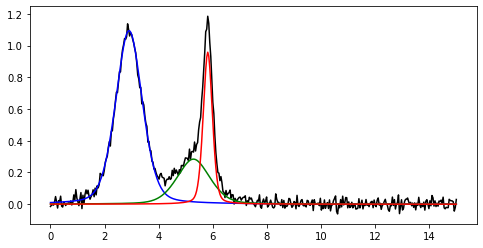

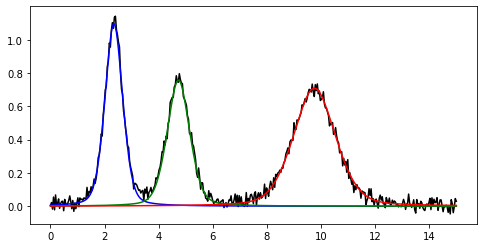

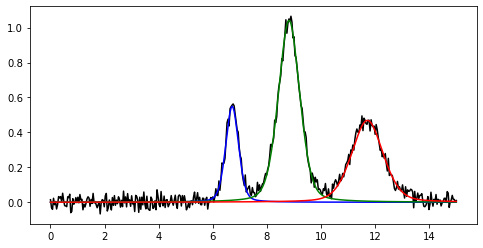

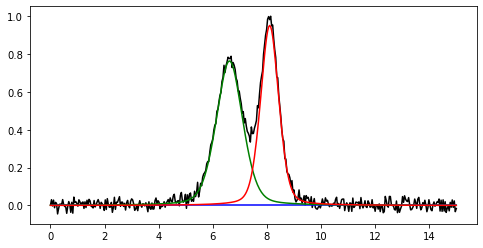

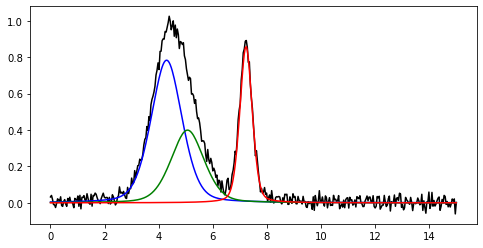

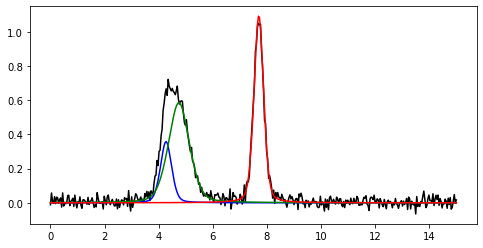

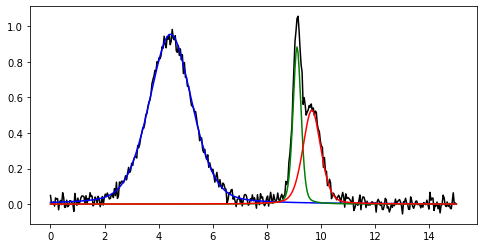

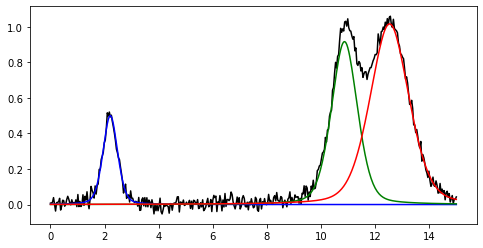

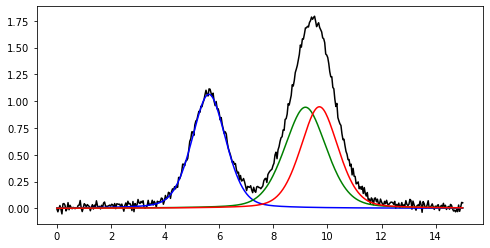

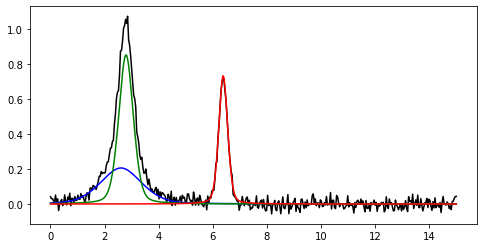

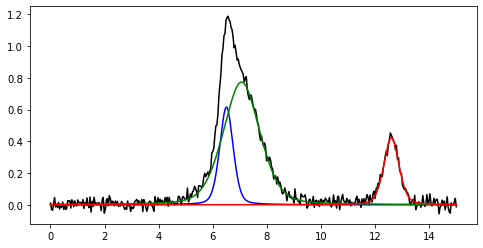

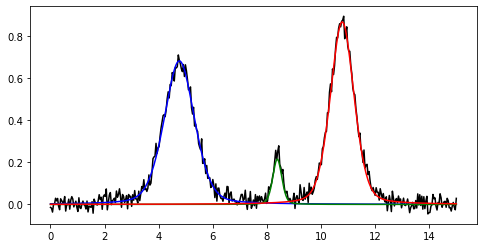

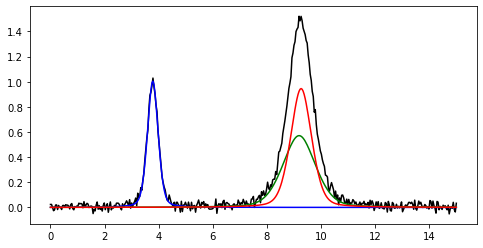

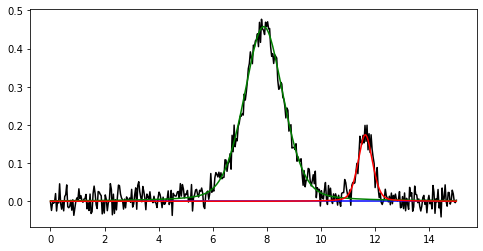

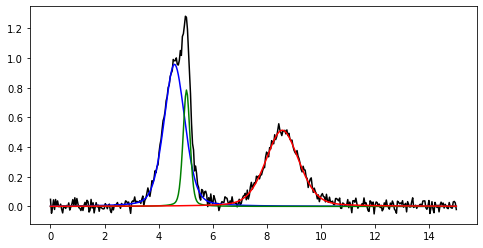

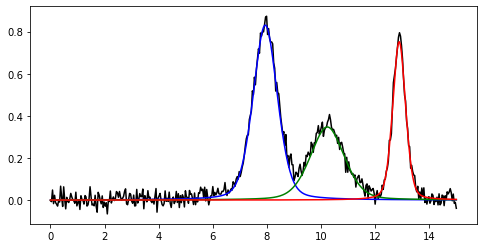

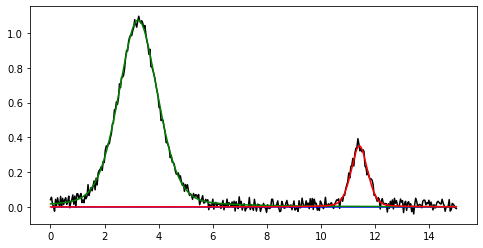

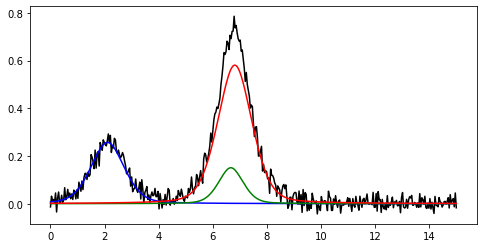

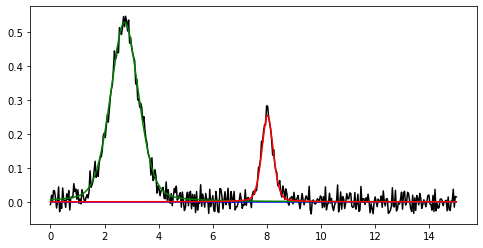

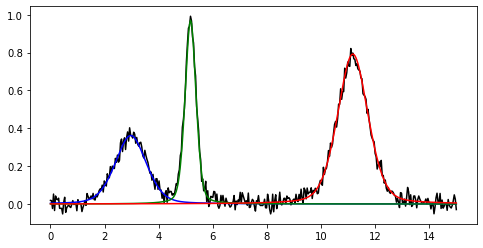

In [7]:
for i in range(20,40):
    plt.figure(figsize = (8,4))
    plt.plot(x,graph[i],color = 'black')
    plt.plot(x,y(center[i][0],width[i][0],amp[i][0],x), color = 'blue')
    plt.plot(x,y(center[i][1],width[i][1],amp[i][1],x), color= 'green')
    plt.plot(x,y(center[i][2],width[i][2],amp[i][2],x), color='red')

In [8]:
#90:9:1
data_number=1000000

train_graph = graph[:int(0.9*2*data_number)]
val_graph = graph[int(0.9*2*data_number):int(0.99*2*data_number)]
test_graph = graph[int(0.99*2*data_number):]

train_center = center[:int(0.9*2*data_number)]
val_center = center[int(0.9*2*data_number):int(0.99*2*data_number)]
test_center = center[int(0.99*2*data_number):]

train_width = width[:int(0.9*2*data_number)]
val_width = width[int(0.9*2*data_number):int(0.99*2*data_number)]
test_width = width[int(0.99*2*data_number):]

train_amp = amp[:int(0.9*2*data_number)]
val_amp = amp[int(0.9*2*data_number):int(0.99*2*data_number)]
test_amp = amp[int(0.99*2*data_number):]

train_peak_number = peak_number[:int(0.9*2*data_number)]
val_peak_number = peak_number[int(0.9*2*data_number):int(0.99*2*data_number)]
test_peak_number = peak_number[int(0.99*2*data_number):]

In [9]:
print(train_graph.shape, val_graph.shape, test_graph.shape)
print(train_center.shape, val_center.shape, test_center.shape)
print(train_width.shape, val_width.shape, test_width.shape)
print(train_amp.shape, val_amp.shape, test_amp.shape)
print(train_peak_number.shape, val_peak_number.shape, test_peak_number.shape)

(1800000, 401) (180000, 401) (20000, 401)
(1800000, 3) (180000, 3) (20000, 3)
(1800000, 3) (180000, 3) (20000, 3)
(1800000, 3) (180000, 3) (20000, 3)
(1800000,) (180000,) (20000,)


In [10]:
# conv1d 쓰기 위해 reshape 사용 
# 1차원 그래프 변환

train_graph = train_graph.reshape(train_graph.shape[0],train_graph.shape[1],1)
val_graph = val_graph.reshape(val_graph.shape[0],val_graph.shape[1],1)
test_graph = test_graph.reshape(test_graph.shape[0],test_graph.shape[1],1)

print(train_graph.shape)
print(val_graph.shape)
print(test_graph.shape)

(1800000, 401, 1)
(180000, 401, 1)
(20000, 401, 1)


In [11]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense, Flatten, BatchNormalization
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import MaxPooling1D, GlobalMaxPooling1D
from keras.layers.merge import concatenate
from keras import layers

In [12]:
len(x)

401

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 401, 1)]     0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 302, 128)     12928       input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, 151, 128)     0           conv1d[0][0]                     
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 102, 128)     819328      max_pooling1d[0][0]              
______________________________________________________________________________________________

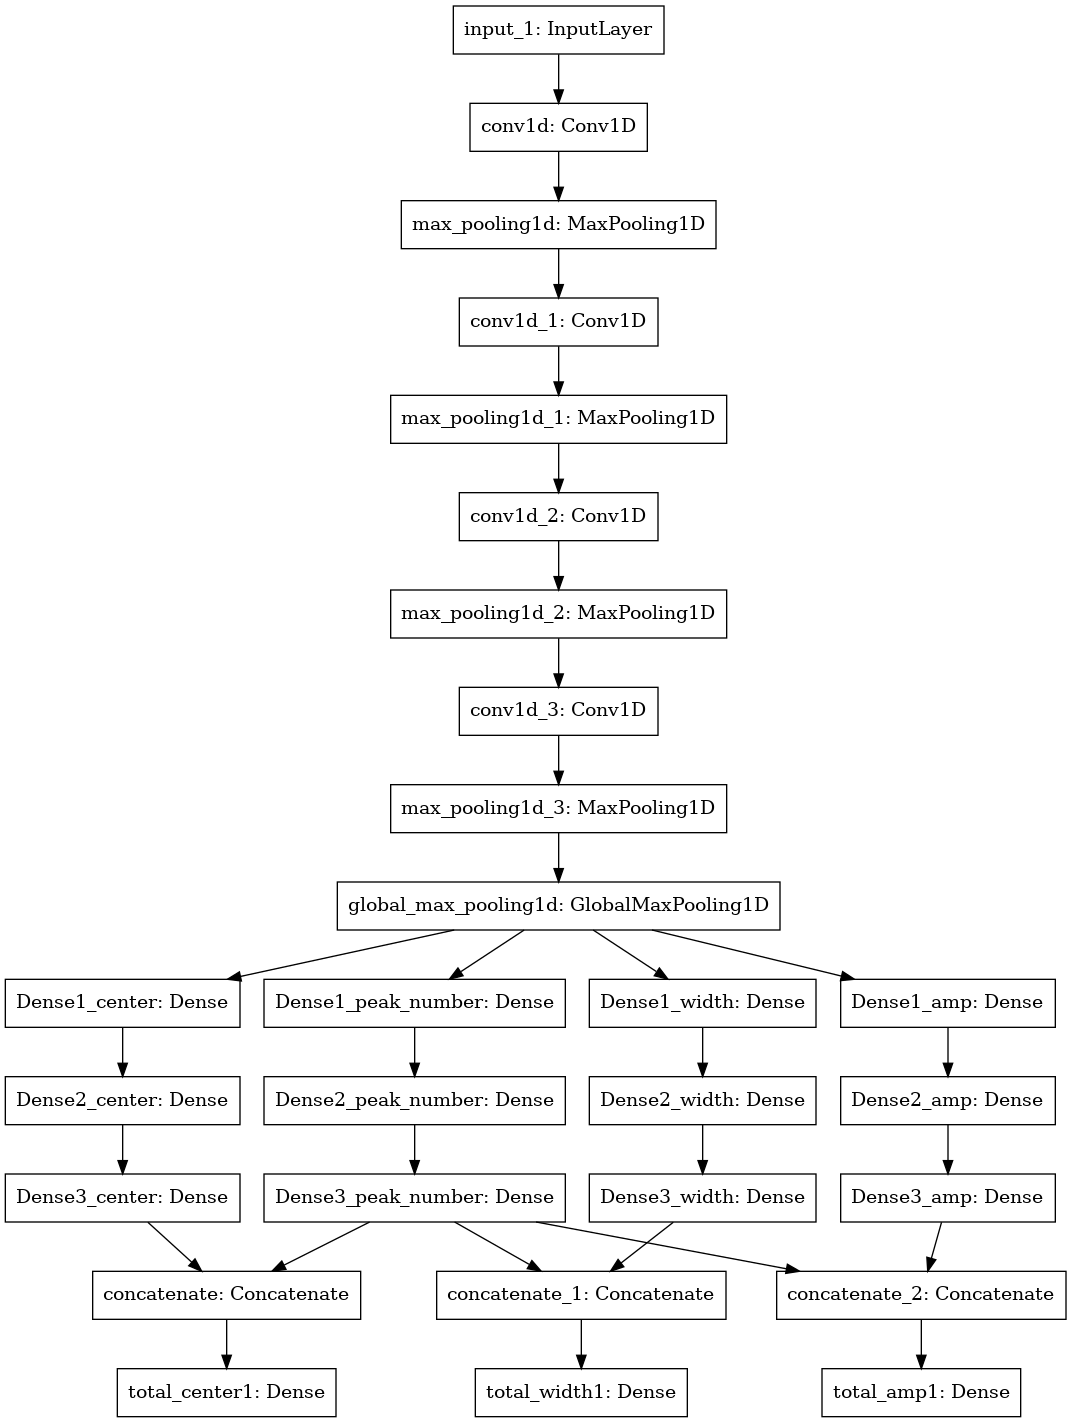

In [13]:

input_data = Input(shape = (len(x),1))
t = layers.Conv1D(128,100,activation = 'relu')(input_data)
t = layers.MaxPooling1D(2)(t)
t = layers.Conv1D(128,50,activation = 'relu')(t)
t = layers.MaxPooling1D(2)(t)
t = layers.Conv1D(128,20,activation = 'relu')(t)
t = layers.MaxPooling1D(2)(t)
t = layers.Conv1D(16,10,activation = 'relu')(t)
t = layers.MaxPooling1D(2)(t)

t = layers.GlobalMaxPooling1D()(t)

Dense1_peak_number = Dense(200, activation = 'relu',name='Dense1_peak_number')(t)
Dense2_peak_number = Dense(200, activation = 'relu',name = 'Dense2_peak_number')(Dense1_peak_number)
Dense3_peak_number = Dense(1, activation = 'linear',name = 'Dense3_peak_number')(Dense2_peak_number)


Dense1_center = Dense(200, activation = 'relu',name='Dense1_center')(t)
Dense2_center = Dense(100, activation = 'relu',name='Dense2_center')(Dense1_center)
Dense3_center = Dense(40, activation = 'relu',name='Dense3_center')(Dense2_center)
# output_center = Dense(3, activation = 'linear',name='output_center')(Dense3_center)

Dense1_width = Dense(200,activation = 'relu',name='Dense1_width')(t)
Dense2_width = Dense(100,activation = 'relu',name='Dense2_width')(Dense1_width)
Dense3_width = Dense(40,activation = 'relu',name='Dense3_width')(Dense2_width)
# output_width = Dense(3,activation = 'linear',name='output_width')(Dense3_width)

Dense1_amp = Dense(200,activation = 'relu',name='Dense1_amp')(t)
Dense2_amp = Dense(100,activation = 'relu',name='Dense2_amp')(Dense1_amp)
Dense3_amp = Dense(40,activation = 'relu',name='Dense3_amp')(Dense2_amp)
# output_amp = Dense(3,activation = 'linear',name='output_amp')(Dense3_amp)

center_merge = concatenate([Dense3_peak_number,Dense3_center])
# total_center1 = Dense(40, activation = 'relu',name = 'total_center1')(center_merge)
# total_center2 = Dense(40, activation = 'relu',name = 'total_center2')(total_center1)
total_center1 = Dense(3, activation = 'linear',name = 'total_center1')(center_merge)


width_merge = concatenate([Dense3_peak_number,Dense3_width])
# total_width1 = Dense(40, activation = 'relu',name = 'total_width1')(width_merge)
# total_width2 = Dense(40, activation = 'relu',name = 'total_width2')(total_width1)
total_width1= Dense(3, activation = 'linear',name = 'total_width1')(width_merge)


amp_merge = concatenate([Dense3_peak_number,Dense3_amp])
# total_amp1 = Dense(40, activation = 'relu',name = 'total_amp1')(amp_merge)
# total_amp2 = Dense(40, activation = 'relu',name = 'total_amp2')(total_amp1)
total_amp1 = Dense(3, activation = 'linear',name = 'total_amp1')(amp_merge)


model = Model(inputs = input_data,
              outputs = [Dense3_peak_number,total_center1,total_width1,total_amp1])
print(model.summary())
plot_model(model)

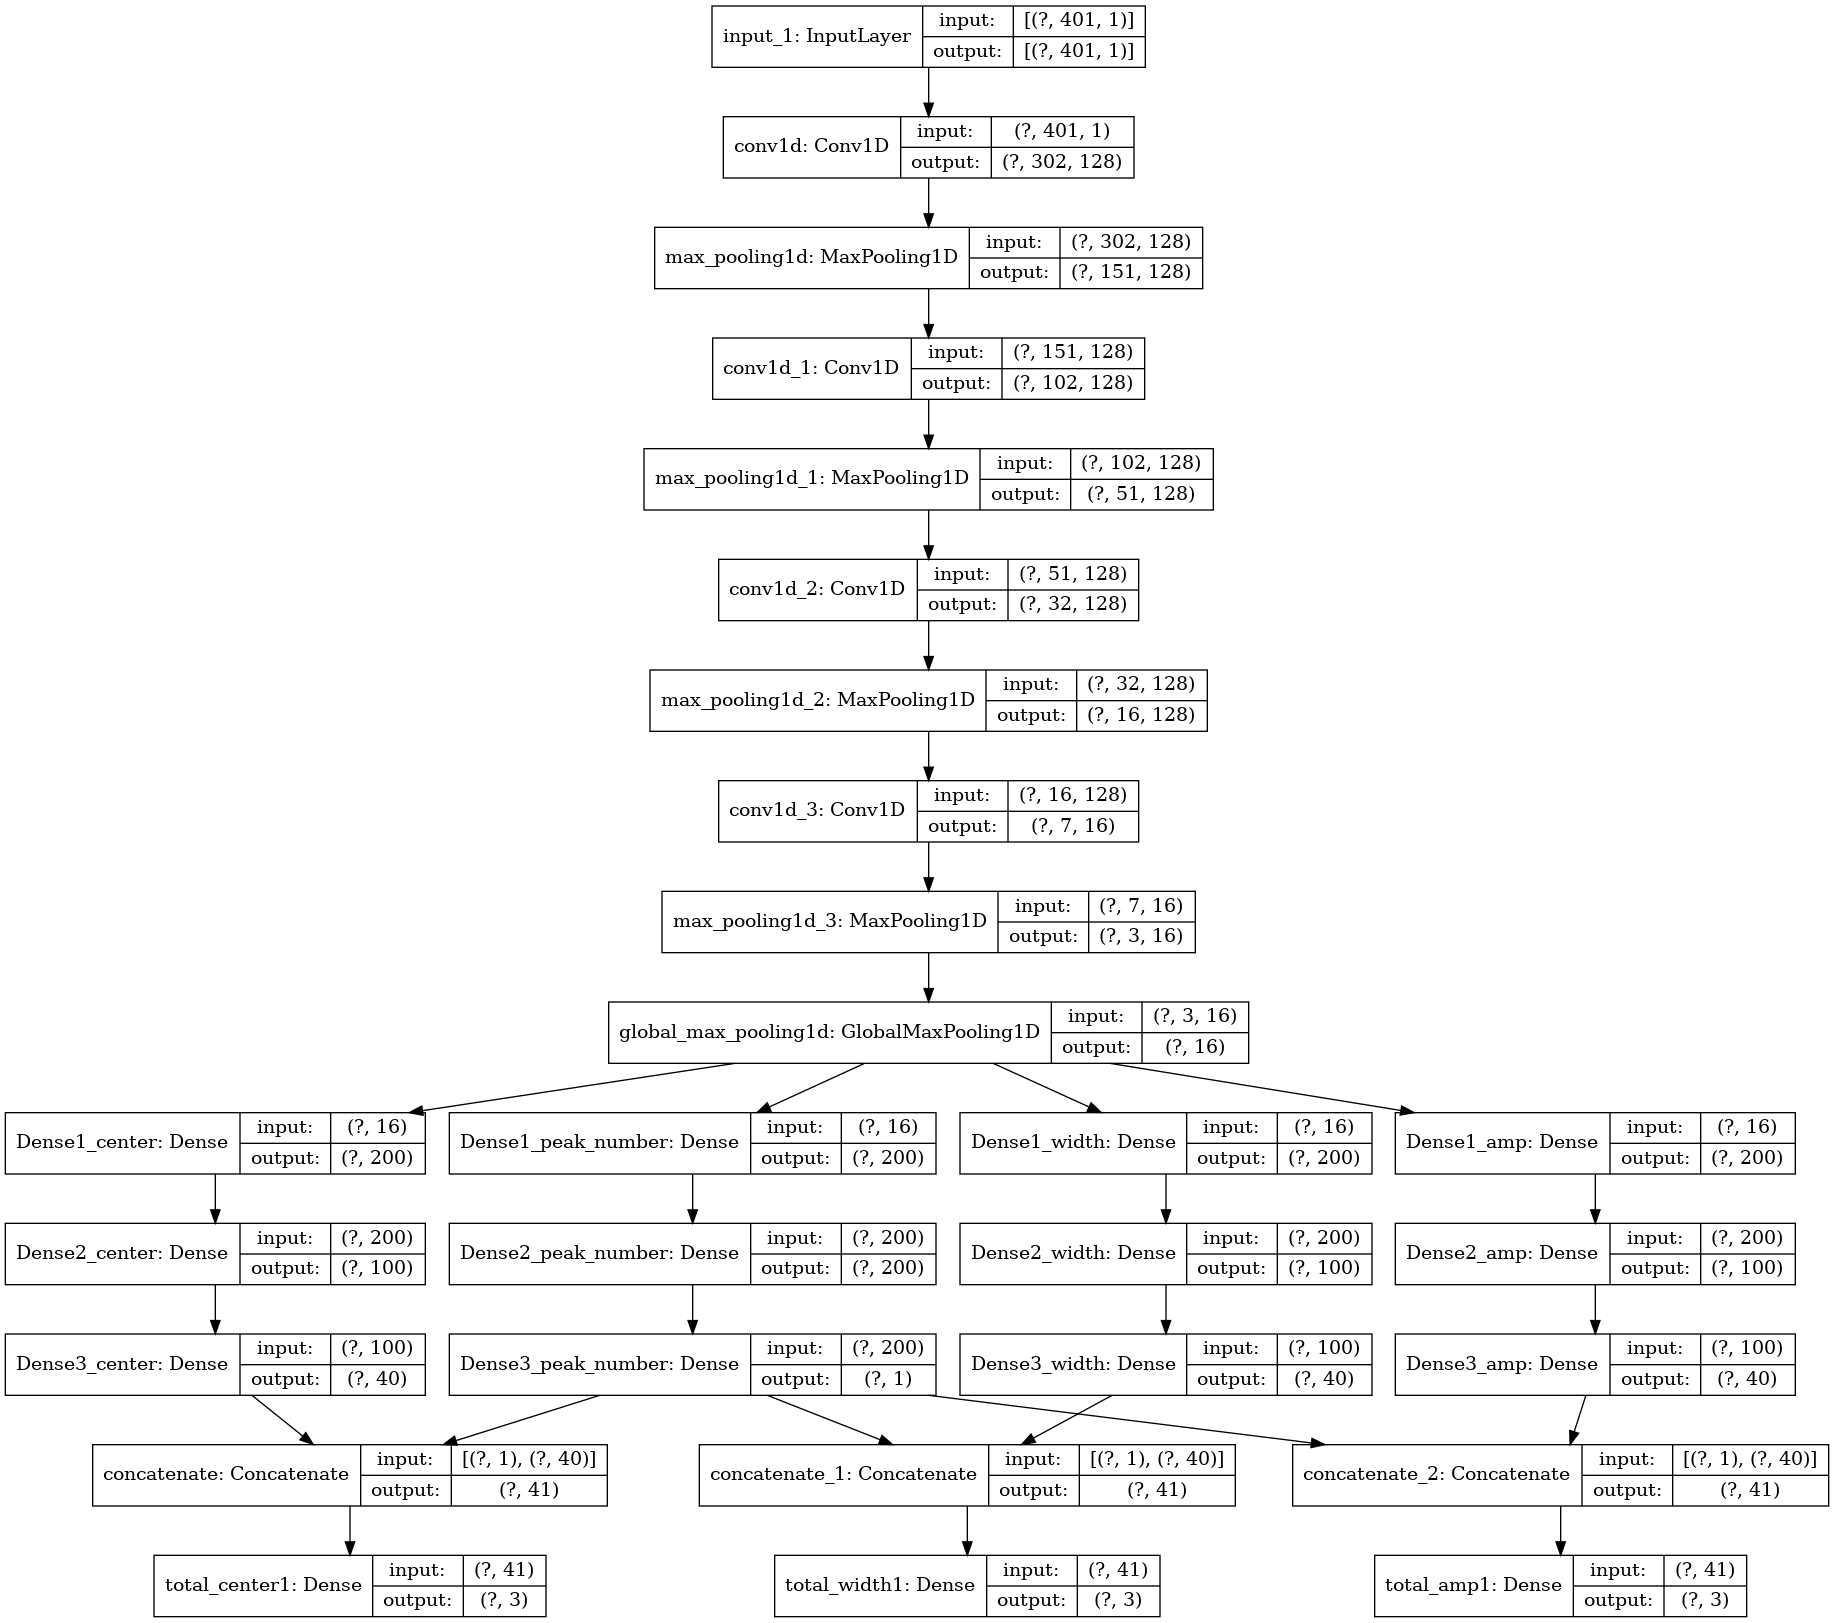

In [14]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file = 'labels.png')
plot_model(model, to_file='model_shapes.png', show_shapes=True)

In [15]:
model.compile(optimizer='adam',
              loss = {'total_center1' : 'mse',
                      'total_width1' : 'mse',
                      'total_amp1' : 'mse',
                      'Dense3_peak_number' : 'mse'},
#               loss_weights={'total_center3' : 0.5,
#                            'total_width3' : 1,
#                            'total_amp3' : 1,
#                             'Dense3_peak_number' :1 },
              metrics = ['mae'])

In [16]:
models=model.fit(train_graph, [train_peak_number,train_center , train_width, train_amp],
          epochs = 50,
          batch_size = 1000,
          validation_data = (val_graph, [val_peak_number, val_center, val_width, val_amp]))

Epoch 1/50
1800/1800 [==============================] - 93s 52ms/step - loss: 2.7666 - Dense3_peak_number_loss: 0.1681 - total_center1_loss: 2.3397 - total_width1_loss: 0.1837 - total_amp1_loss: 0.0751 - Dense3_peak_number_mae: 0.2928 - total_center1_mae: 0.9692 - total_width1_mae: 0.3350 - total_amp1_mae: 0.2219 - val_loss: 0.8495 - val_Dense3_peak_number_loss: 0.0362 - val_total_center1_loss: 0.6489 - val_total_width1_loss: 0.1029 - val_total_amp1_loss: 0.0614 - val_Dense3_peak_number_mae: 0.1179 - val_total_center1_mae: 0.4380 - val_total_width1_mae: 0.2344 - val_total_amp1_mae: 0.1966
Epoch 2/50
1800/1800 [==============================] - 95s 53ms/step - loss: 0.6003 - Dense3_peak_number_loss: 0.0233 - total_center1_loss: 0.4437 - total_width1_loss: 0.0809 - total_amp1_loss: 0.0524 - Dense3_peak_number_mae: 0.0877 - total_center1_mae: 0.3586 - total_width1_mae: 0.2028 - total_amp1_mae: 0.1774 - val_loss: 0.3282 - val_Dense3_peak_number_loss: 0.0082 - val_total_center1_loss: 0.2273

In [17]:
test_graph.shape

(20000, 401, 1)

In [18]:
for key in models.history.keys():
    print(key)

loss
Dense3_peak_number_loss
total_center1_loss
total_width1_loss
total_amp1_loss
Dense3_peak_number_mae
total_center1_mae
total_width1_mae
total_amp1_mae
val_loss
val_Dense3_peak_number_loss
val_total_center1_loss
val_total_width1_loss
val_total_amp1_loss
val_Dense3_peak_number_mae
val_total_center1_mae
val_total_width1_mae
val_total_amp1_mae


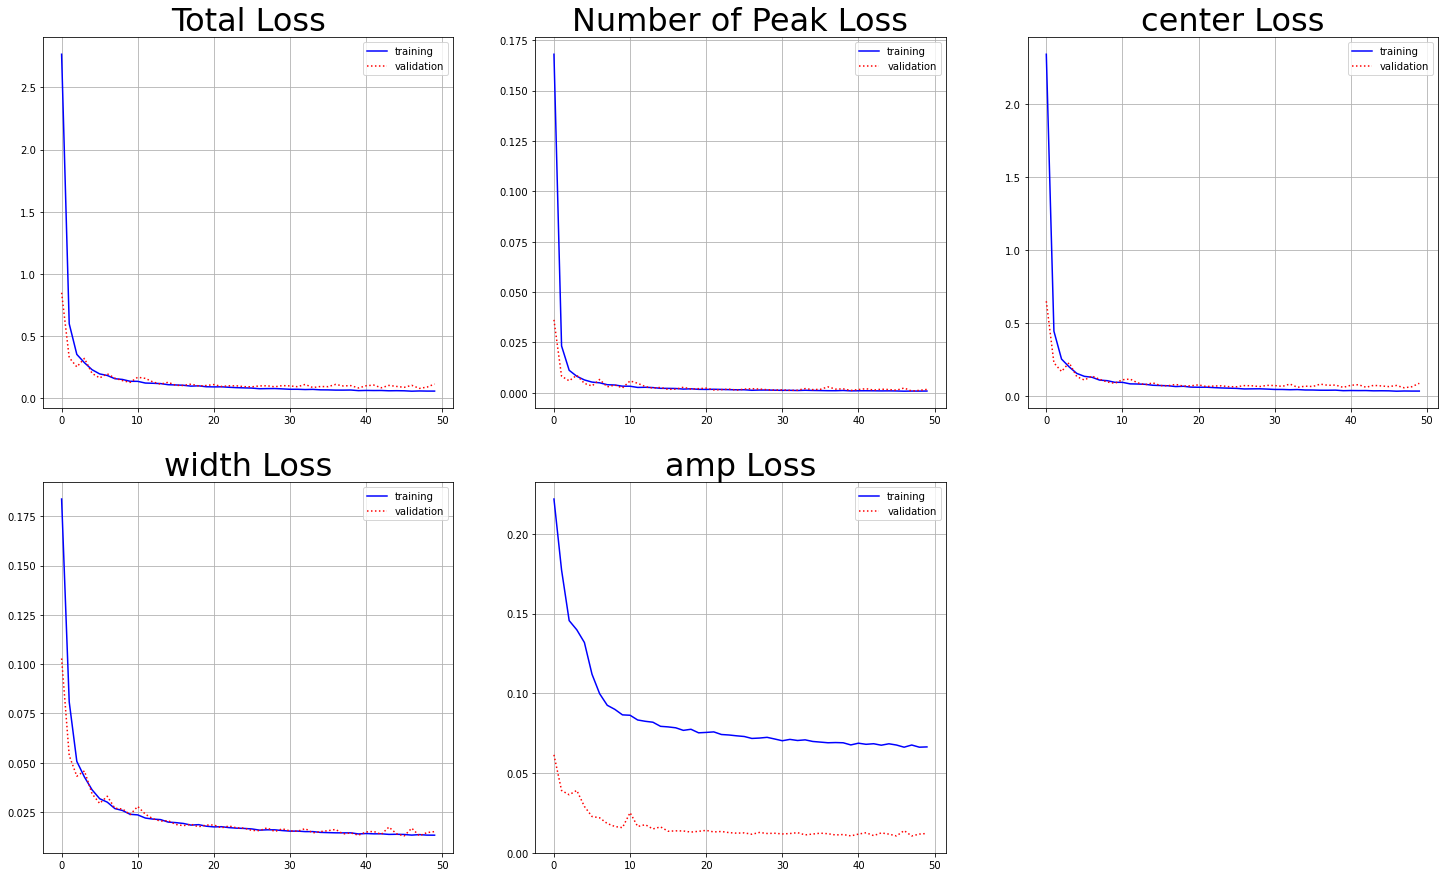

In [19]:
plt.figure(figsize = (25, 15))

plt.subplot(231)
plt.plot(models.history['loss'], 'b-', label = 'training')
plt.plot(models.history['val_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Total Loss", size = 32)
plt.legend()


plt.subplot(232)
plt.plot(models.history['Dense3_peak_number_loss'], 'b-', label = 'training')
plt.plot(models.history['val_Dense3_peak_number_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Number of Peak Loss", size = 32)
plt.legend()

plt.subplot(233)
plt.plot(models.history['total_center1_loss'], 'b-', label = 'training')
plt.plot(models.history['val_total_center1_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("center Loss", size = 32)
plt.legend()

plt.subplot(234)
plt.plot(models.history['total_width1_loss'], 'b-', label = 'training')
plt.plot(models.history['val_total_width1_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("width Loss", size = 32)
plt.legend()

plt.subplot(235)
plt.plot(models.history['total_amp1_mae'], 'b-', label = 'training')
plt.plot(models.history['val_total_amp1_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("amp Loss", size = 32)
plt.legend()


In [20]:
prediction = model.predict(test_graph)
print(len(prediction))

4


In [21]:
print(prediction[0].shape)
print(prediction[1].shape)# if center
print(prediction[2].shape)# width
print(prediction[3].shape)# amp

(20000, 1)
(20000, 3)
(20000, 3)
(20000, 3)


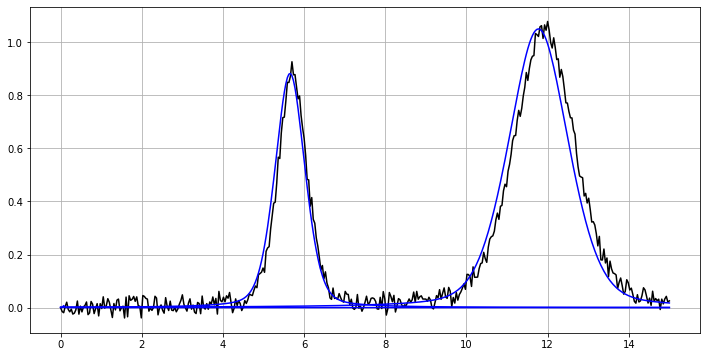

real_center   [ 0.          5.71315308 11.91923309]
predict_center [ 0.06729108 5.6518955 11.774163 ]
---------------
real_width    [0.         0.84337558 1.79121459]
predict_center [ -0.009666942 0.8807619 1.7585827 ]
---------------
real_amp      [0.         0.88023975 1.04841723]
predict_center [ 0.037281513 0.88313025 1.050792 ]


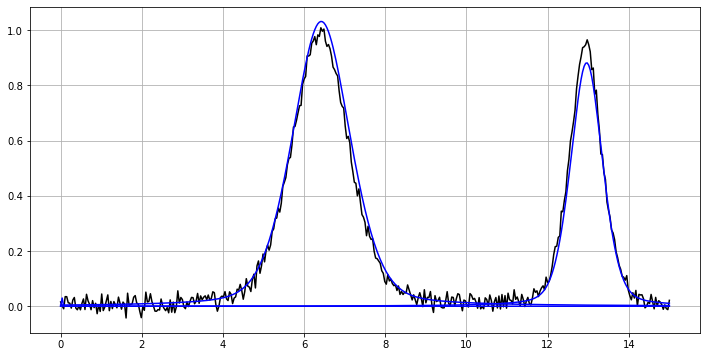

real_center   [ 0.          6.39994478 12.93951819]
predict_center [ 0.036395073 6.4221325 12.961384 ]
---------------
real_width    [0.         1.65652237 0.93438808]
predict_center [ -0.01023405 1.7050798 0.93788505 ]
---------------
real_amp      [0.         0.99348086 0.9478093 ]
predict_center [ 0.03083697 1.0320351 0.8823369 ]


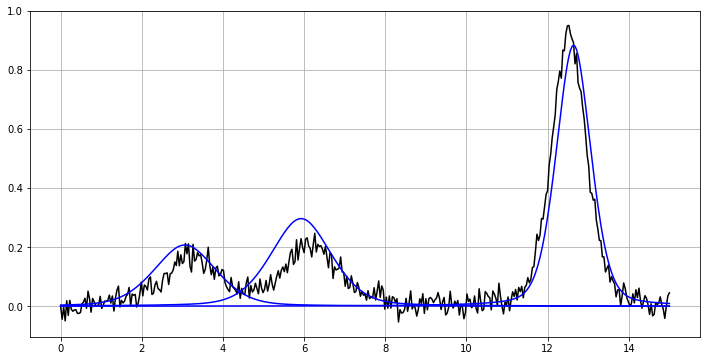

real_center   [ 3.23631434  6.18606995 12.52827948]
predict_center [ 3.0643115 5.9254575 12.640408 ]
---------------
real_width    [1.66278035 1.68069287 1.00126402]
predict_center [ 1.8115679 1.7745049 1.0169646 ]
---------------
real_amp      [0.17531519 0.19742663 0.9243484 ]
predict_center [ 0.20745242 0.29665107 0.88361204 ]


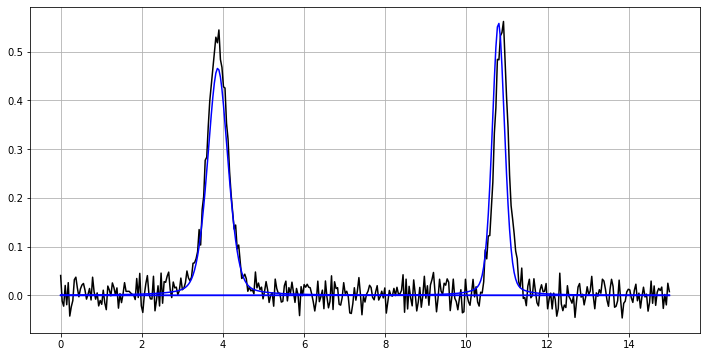

real_center   [ 0.          3.86715569 10.86221601]
predict_center [ 0.03234172 3.8724957 10.788247 ]
---------------
real_width    [0.         0.59165533 0.40581259]
predict_center [ 0.0050212517 0.59600675 0.3709303 ]
---------------
real_amp      [0.         0.51955378 0.53934786]
predict_center [ 0.024495244 0.4659664 0.55976534 ]


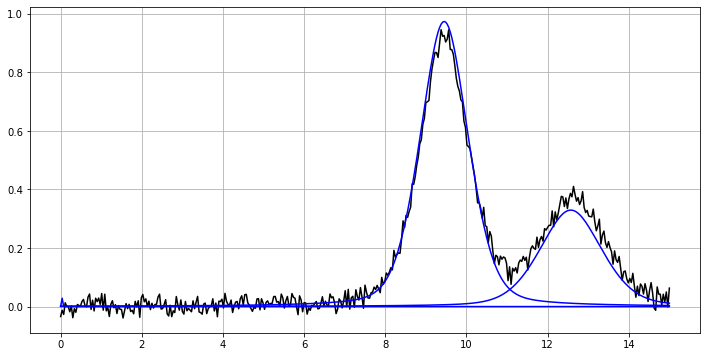

real_center   [ 0.          9.45233636 12.62868582]
predict_center [ 0.037986457 9.451282 12.571407 ]
---------------
real_width    [0.         1.44668865 1.87998592]
predict_center [ -0.023378216 1.4165237 1.8092132 ]
---------------
real_amp      [0.         0.91245941 0.36050666]
predict_center [ 0.028449222 0.97413963 0.3295659 ]


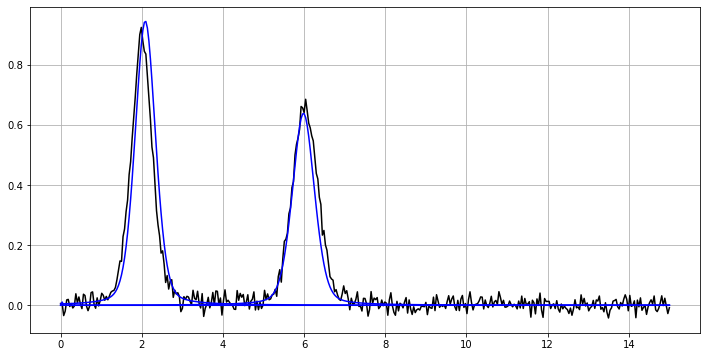

real_center   [0.         2.00332775 6.03248714]
predict_center [ 0.046885043 2.085719 5.9839 ]
---------------
real_width    [0.         0.59737084 0.7272154 ]
predict_center [ 0.0142906085 0.60159796 0.65050447 ]
---------------
real_amp      [0.         0.90353073 0.66262424]
predict_center [ 0.03427784 0.9457653 0.6387154 ]


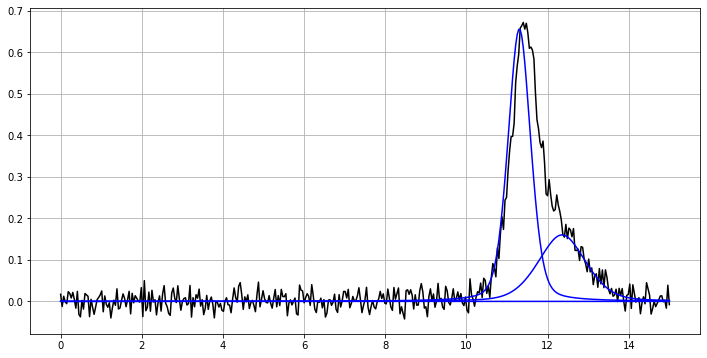

real_center   [ 0.         11.42268043 12.25882526]
predict_center [ 0.009070337 11.303086 12.354282 ]
---------------
real_width    [0.         0.75334379 1.47571775]
predict_center [ -0.0069319233 0.6637482 1.3980695 ]
---------------
real_amp      [0.         0.59638167 0.17278906]
predict_center [ 0.021067515 0.65610725 0.16004808 ]


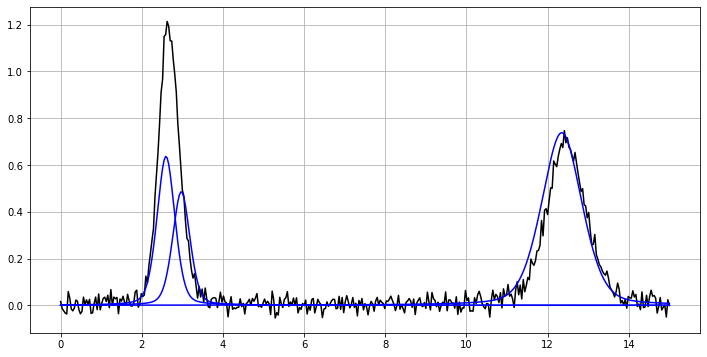

real_center   [ 2.57538501  2.73040878 12.45116549]
predict_center [ 2.595495 2.9731395 12.349077 ]
---------------
real_width    [0.41405293 0.60919744 1.12779081]
predict_center [ 0.52516437 0.50772554 1.1841314 ]
---------------
real_amp      [0.5085511  0.80758984 0.70893355]
predict_center [ 0.6370071 0.4858081 0.7380776 ]


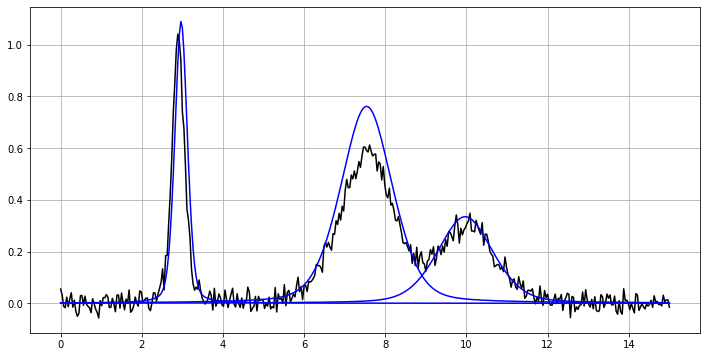

real_center   [ 2.9017155   7.54113871 10.03829508]
predict_center [ 2.968856 7.5399375 9.968223 ]
---------------
real_width    [0.3609779 1.5868491 1.5857514]
predict_center [ 0.3666555 1.520175 1.6316651 ]
---------------
real_amp      [0.9967733  0.57811673 0.29408781]
predict_center [ 1.0912749 0.7617503 0.33482876 ]


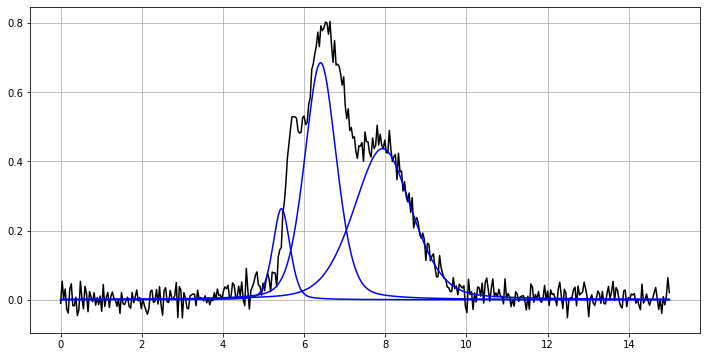

real_center   [5.70187413 6.47325447 7.95269075]
predict_center [ 5.440974 6.40487 7.9335346 ]
---------------
real_width    [0.35270478 1.15793397 1.67777024]
predict_center [ 0.5002496 0.9360818 1.7059703 ]
---------------
real_amp      [0.28978847 0.72433166 0.41654231]
predict_center [ 0.26376528 0.68464094 0.4365139 ]


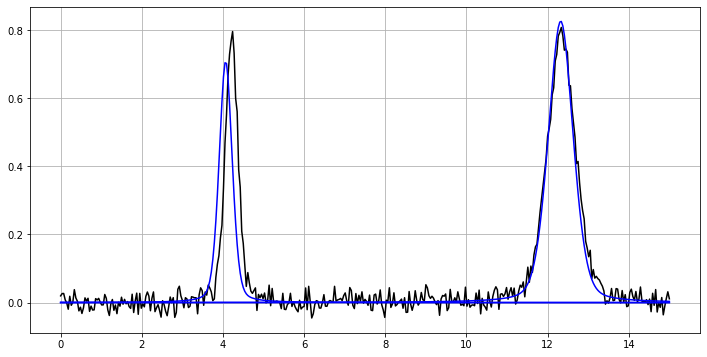

real_center   [ 0.          4.21687094 12.34120659]
predict_center [ 0.048534334 4.067 12.322889 ]
---------------
real_width    [0.         0.36773928 0.81390437]
predict_center [ -0.003924243 0.3823699 0.7297418 ]
---------------
real_amp      [0.         0.78705796 0.79347587]
predict_center [ 0.022802204 0.7088251 0.8263859 ]


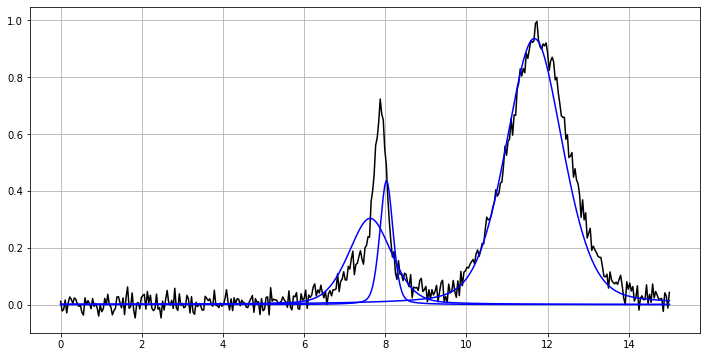

real_center   [ 7.64690374  7.88672447 11.75998207]
predict_center [ 7.627262 8.029156 11.674151 ]
---------------
real_width    [1.57721792 0.35065511 1.76987164]
predict_center [ 1.266241 0.3857721 1.6744956 ]
---------------
real_amp      [0.15874303 0.52349397 0.94926077]
predict_center [ 0.30339634 0.43633276 0.93612266 ]


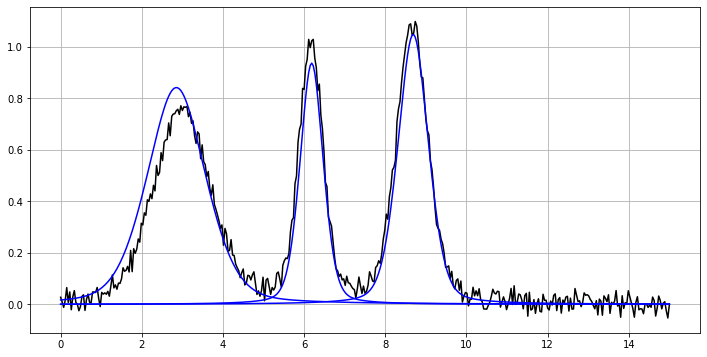

real_center   [2.97550177 6.17211837 8.66438667]
predict_center [ 2.8518732 6.1861534 8.6885 ]
---------------
real_width    [1.63453699 0.70265382 0.91474209]
predict_center [ 1.7189839 0.6806092 0.8965731 ]
---------------
real_amp      [0.76022675 1.01366238 1.09569614]
predict_center [ 0.84154177 0.9363775 1.0479838 ]


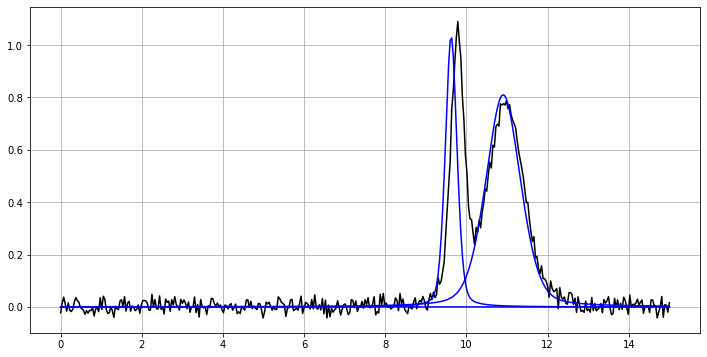

real_center   [ 0.          9.77946893 10.97017916]
predict_center [ 0.05541861 9.623138 10.904716 ]
---------------
real_width    [0.         0.39829634 1.05510464]
predict_center [ -0.006652318 0.3412655 1.0212392 ]
---------------
real_amp      [0.         1.01298834 0.78358955]
predict_center [ 0.03403236 1.0334812 0.81028837 ]


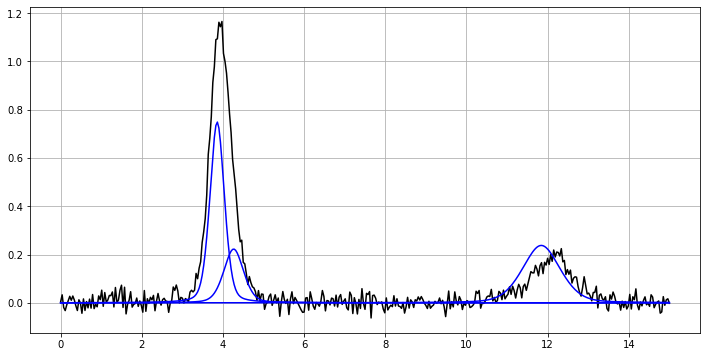

real_center   [ 3.8569353   4.12070216 12.11402843]
predict_center [ 3.857317 4.2635436 11.843898 ]
---------------
real_width    [0.4981711  0.58429175 1.10961953]
predict_center [ 0.4223059 0.57736164 1.1060005 ]
---------------
real_amp      [0.83741193 0.49685655 0.19540706]
predict_center [ 0.7487351 0.22282127 0.23773955 ]


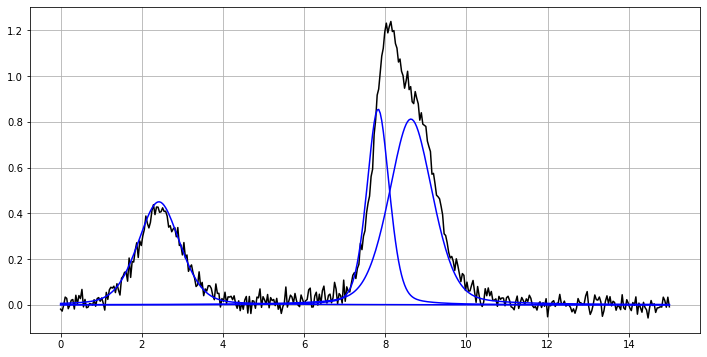

real_center   [2.4287244  8.00130851 8.73111697]
predict_center [ 2.4217396 7.82314 8.629957 ]
---------------
real_width    [1.30205305 0.73029477 1.26629847]
predict_center [ 1.24397 0.66144 1.2774949 ]
---------------
real_amp      [0.414536   0.85436318 0.82462015]
predict_center [ 0.45042184 0.8552204 0.8118084 ]


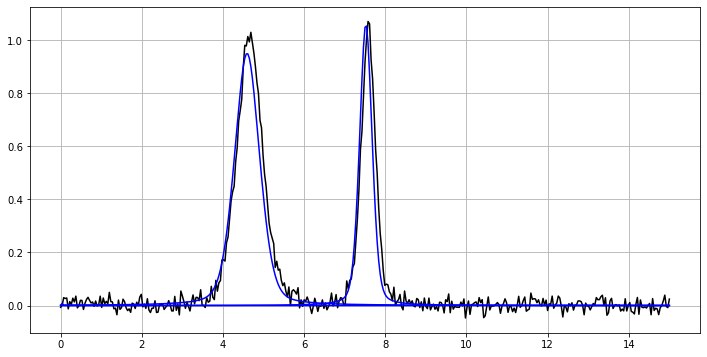

real_center   [0.         4.6604788  7.58096173]
predict_center [ 0.046743512 4.594179 7.521179 ]
---------------
real_width    [0.         0.74087437 0.40953535]
predict_center [ 0.012687363 0.7357826 0.3673558 ]
---------------
real_amp      [0.         1.0195198  1.04926695]
predict_center [ 0.033168763 0.950103 1.0600209 ]


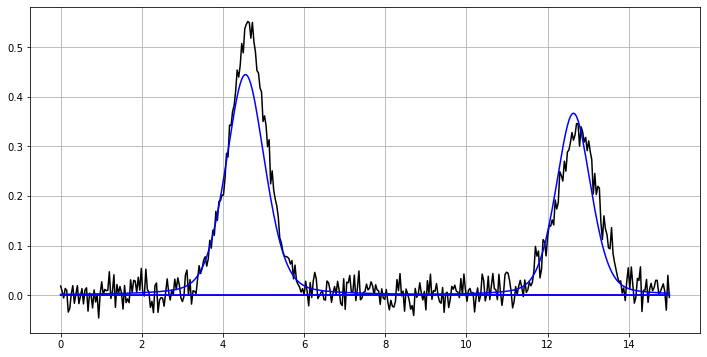

real_center   [ 0.          4.61549707 12.73793585]
predict_center [ 0.051995456 4.5546474 12.6367 ]
---------------
real_width    [0.         1.11693444 1.17194019]
predict_center [ -0.013182305 1.1451088 1.0196128 ]
---------------
real_amp      [0.         0.53062024 0.33579517]
predict_center [ 0.022640616 0.4448076 0.36685684 ]


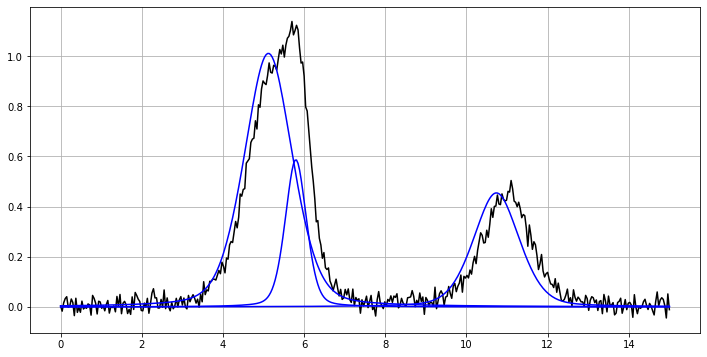

real_center   [ 5.12023748  5.84530511 10.99748078]
predict_center [ 5.1193132 5.79572 10.737767 ]
---------------
real_width    [1.34057725 0.74437628 1.38113455]
predict_center [ 1.4215304 0.6211822 1.348376 ]
---------------
real_amp      [0.84935913 0.70472954 0.46106577]
predict_center [ 1.0107944 0.5869972 0.4545365 ]


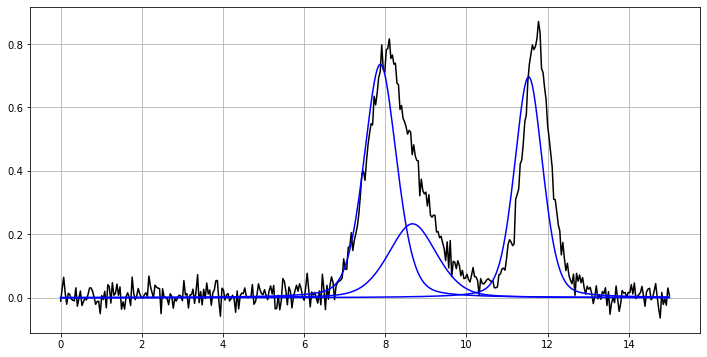

real_center   [ 8.0085005   8.9801749  11.72798113]
predict_center [ 7.8779287 8.671557 11.532749 ]
---------------
real_width    [1.09531881 1.22843115 0.76551006]
predict_center [ 0.9560534 1.420342 0.83002084 ]
---------------
real_amp      [0.71929417 0.23130514 0.83006498]
predict_center [ 0.7363343 0.23309907 0.69677836 ]


In [22]:
for i in range(30,50):

    plt.figure(figsize=(12,6))
    plt.plot(x,test_graph[i] ,color='black')
    plt.plot(x,y(prediction[1][i][0],prediction[2][i][0],prediction[3][i][0],x),color = 'blue')
    plt.plot(x,y(prediction[1][i][1],prediction[2][i][1],prediction[3][i][1],x),color = 'blue')
    plt.plot(x,y(prediction[1][i][2],prediction[2][i][2],prediction[3][i][2],x),color = 'blue')
    plt.grid(True)
    plt.show()
    print('real_center  ',test_center[i])
    print('predict_center','[',prediction[1][i][0],prediction[1][i][1],prediction[1][i][2],']')
    print('---------------')
    print('real_width   ',test_width[i])
    print('predict_center','[',prediction[2][i][0],prediction[2][i][1],prediction[2][i][2],']')
    print('---------------')
    print('real_amp     ',test_amp[i])
    print('predict_center','[',prediction[3][i][0],prediction[3][i][1],prediction[3][i][2],']')
    
    

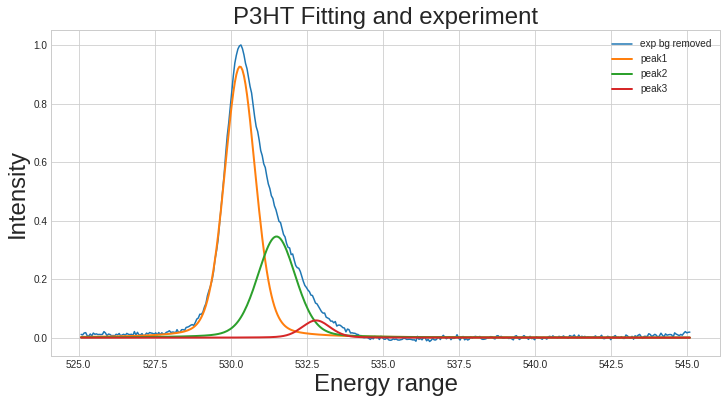

In [23]:
plt.style.use(["seaborn-whitegrid"])
plt.figure(figsize = (12, 6))

# only three peaks
bg = np.loadtxt("ITO_O1s_bg.txt")
exp = np.loadtxt("ITO_O1s_exp.txt")
fitting = np.loadtxt("ITO_O1s_fitting.txt")
peak1 = np.loadtxt("ITO_O1s_p1.txt")
peak2 = np.loadtxt("ITO_O1s_p2.txt")
peak3 = np.loadtxt("ITO_O1s_p3.txt")

# 테스트하고자 하는 실제 XPS 데이터의 parameter 범위가 너무 크므로 
# 네트워크 자체는 작은 규모의 파라미터 범위에서 학습시키고,
# 테스트할 경우, 범위를 줄인 xps 데이터를 불러와서 테스트해본다..

# exp data에서 background를 제거하고, peak 높이를 1로 normalize한다.
plt.plot(exp[:, 0], (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed")

#plt.plot(fitting[:, 0], fitting[:, 1] - bg[:, 1], label = "fitting", linewidth = 2)

# 마찬가지로 개별 peak도 크기를 줄인다.
plt.plot(peak1[:, 0], (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak1", linewidth = 2)
plt.plot(peak2[:, 0], (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak2", linewidth = 2)
plt.plot(peak3[:, 0], (peak3[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = 'peak3', linewidth = 2)

plt.grid(True)
plt.title("P3HT Fitting and experiment", size = 24)
plt.xlabel("Energy range", size = 24)
plt.ylabel("Intensity", size = 24)
plt.legend()
plt.show()

(1, 401, 1)


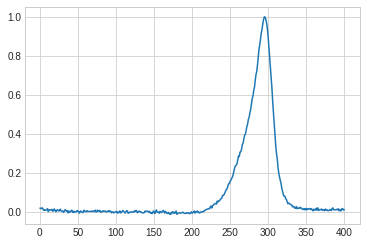

In [24]:
# normalize된 그래프의 y값

test_result = ((exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max())).reshape((1, 401, 1))
print(test_result.shape)
plt.plot(test_result[0])

In [25]:
predict = model.predict(test_result)
print(predict)

[array([[1.9984655]], dtype=float32), array([[ 0.04714298, 10.332811  , 11.340476  ]], dtype=float32), array([[-0.00327622,  1.5967197 ,  0.86357814]], dtype=float32), array([[0.02865264, 0.3825474 , 0.8998086 ]], dtype=float32)]


In [26]:
new_predict = []

for element in predict:
    new_predict.append(element.reshape((element.shape[1])))

In [27]:
print(new_predict[0].shape)  # num_peak
print(new_predict[1].shape)  # center
print(new_predict[2].shape)  # width
print(new_predict[3].shape)  # amp

(1,)
(3,)
(3,)
(3,)


In [28]:
peak_1 = [new_predict[1][0], new_predict[2][0], new_predict[3][0]]
peak_2 = [new_predict[1][1], new_predict[2][1], new_predict[3][1]]
peak_3 = [new_predict[1][2], new_predict[2][2], new_predict[3][2]]

Text(0.5, 1.0, 'Network fitting vs real XPS graph')

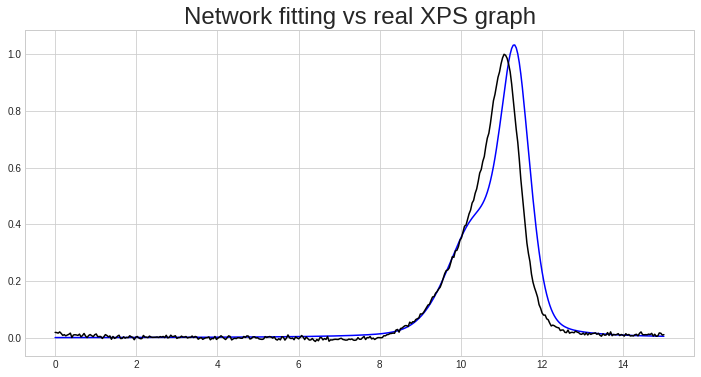

In [29]:
plt.figure(figsize = (12,6))
plt.plot(x,y(new_predict[1][0],new_predict[2][0],new_predict[3][0],x)+
         y(new_predict[1][1],new_predict[2][1],new_predict[3][1],x)+
         y(new_predict[1][2],new_predict[2][2],new_predict[3][2],x),color = 'blue')
# plt.plot(x,y(new_predict[1][1],new_predict[2][1],new_predict[3][1],x),color = 'blue')
# plt.plot(x,y(new_predict[1][2],new_predict[2][2],new_predict[3][2],x),color='blue')
plt.plot(x, (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed",color='black')
plt.title("Network fitting vs real XPS graph", size = 24)

Text(0.5, 1.0, 'Predict_peak1 vs Xps_peak1')

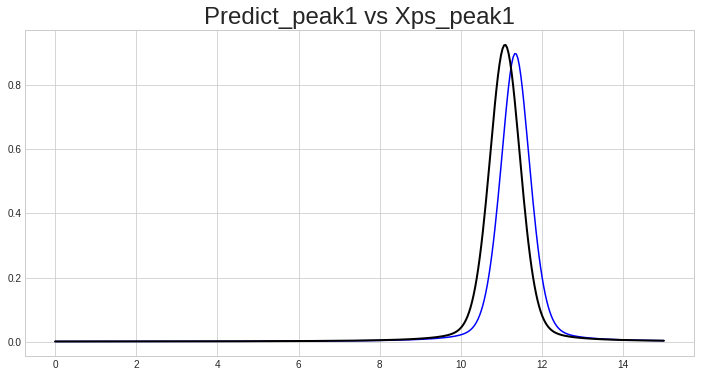

In [30]:
plt.figure(figsize = (12,6))
plt.plot(x,y(new_predict[1][2],new_predict[2][2],new_predict[3][2],x),color='blue')
plt.plot(x, (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak1", linewidth = 2, color='black')
plt.title("Predict_peak1 vs Xps_peak1", size = 24)

Text(0.5, 1.0, 'Pre_peak2 vs Xps_peak2')

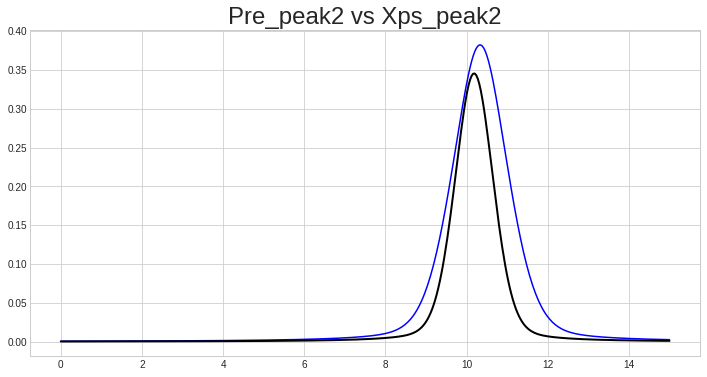

In [31]:
plt.figure(figsize = (12,6))
plt.plot(x,y(new_predict[1][1],new_predict[2][1],new_predict[3][1],x),color='blue')
plt.plot(x, (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()),color = 'black', label = "peak2", linewidth = 2)
plt.title("Pre_peak2 vs Xps_peak2", size = 24)

Text(0.5, 1.0, 'Pre_peak3 vs Xps_peak3')

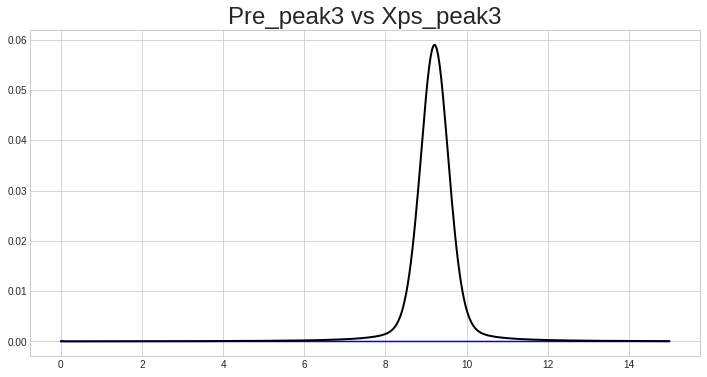

In [32]:
plt.figure(figsize = (12,6))
plt.plot(x,y(new_predict[1][0],new_predict[2][0],new_predict[3][0],x),color='blue')
plt.plot(x, (peak3[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = 'peak3',color = 'black', linewidth = 2)
plt.title("Pre_peak3 vs Xps_peak3", size = 24)

In [33]:
new_predict[1][0],new_predict[2][0],new_predict[3][0]

(0.047142982, -0.0032762215, 0.028652638)

In [34]:
new_predict[0][0]

1.9984655

In [35]:
# only two peak
bg = np.loadtxt("P3HT_S2p_bg.txt")
exp = np.loadtxt("P3HT_S2p_exp.txt")
fitting = np.loadtxt("P3HT_S2p_fitting.txt")
peak1 = np.loadtxt("P3HT_S2p_p1.txt")
peak2 = np.loadtxt("P3HT_S2p_p2.txt")

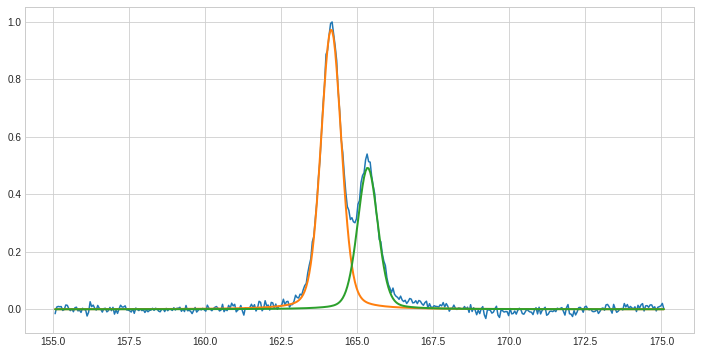

In [36]:
plt.figure(figsize = (12, 6))

# exp data에서 background를 제거하고, peak 높이를 1로 normalize한다.
plt.plot(exp[:, 0], (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed")

# 마찬가지로 개별 peak도 크기를 줄인다.
plt.plot(peak1[:, 0], (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak1", linewidth = 2)
plt.plot(peak2[:, 0], (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak2", linewidth = 2)

In [37]:
# normalize된 그래프의 y값
test_result = ((exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max())).reshape((1, 401, 1))
print(test_result.shape)

(1, 401, 1)


In [38]:
predict = model.predict(test_result)
print(predict)

[array([[1.9939538]], dtype=float32), array([[0.01994586, 7.2289805 , 8.1683    ]], dtype=float32), array([[0.0132409 , 0.60205275, 0.5704817 ]], dtype=float32), array([[0.03312945, 0.5172535 , 1.0254201 ]], dtype=float32)]


In [39]:
new_predict = []

for element in predict:
    new_predict.append(element.reshape((element.shape[1])))

In [40]:
print(new_predict[0].shape)  #number_peak
print(new_predict[1].shape)  # center
print(new_predict[2].shape)  # width
print(new_predict[3].shape)  # amp

(1,)
(3,)
(3,)
(3,)


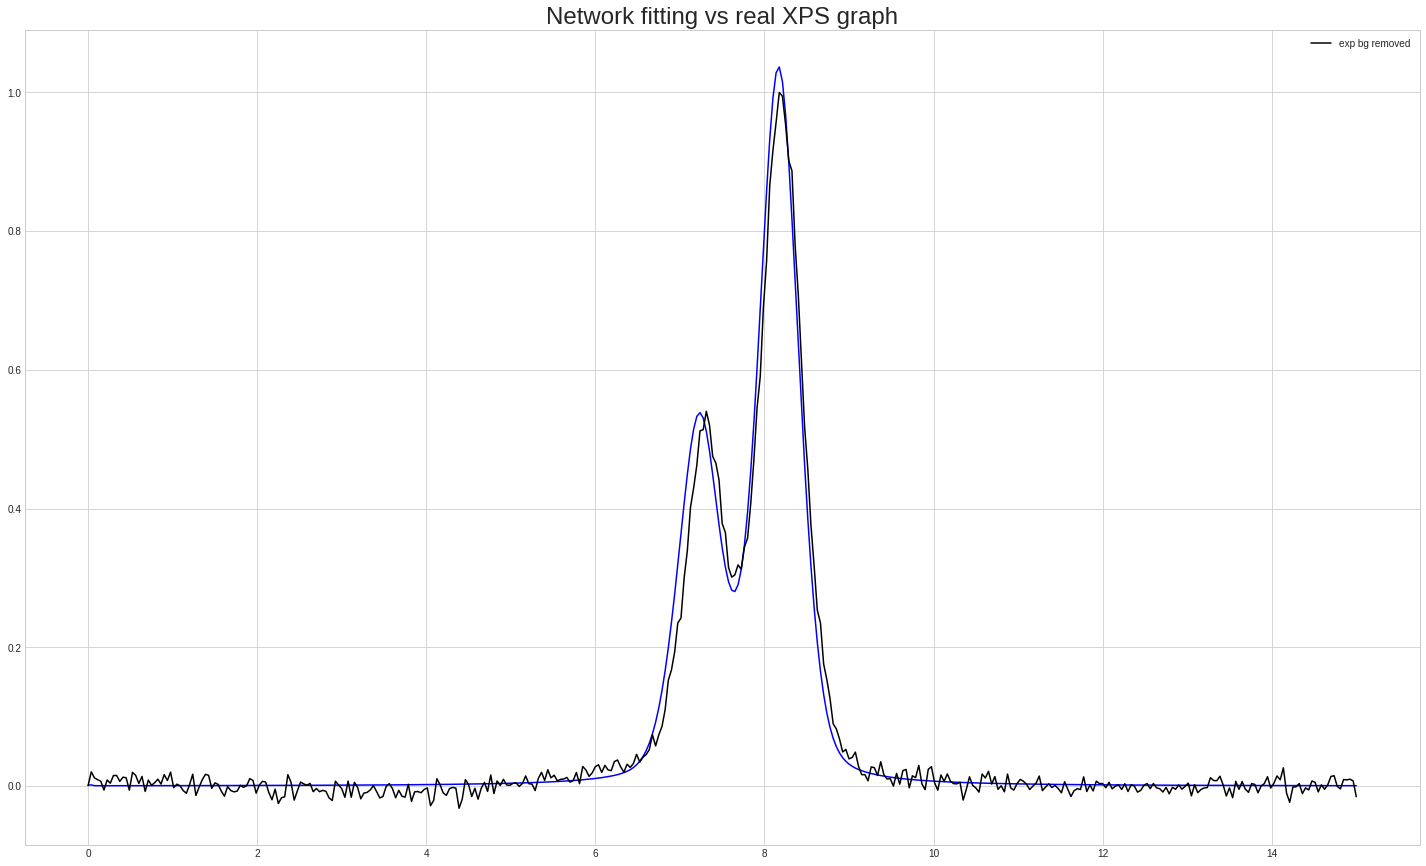

In [41]:
plt.figure(figsize = (25,15))
plt.plot(x,y(new_predict[1][0],new_predict[2][0],new_predict[3][0],x)+
         y(new_predict[1][1],new_predict[2][1],new_predict[3][1],x)+
         y(new_predict[1][2],new_predict[2][2],new_predict[3][2],x),color = 'blue')
plt.plot(x, (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()),color = 'black', label = "exp bg removed")
plt.title("Network fitting vs real XPS graph", size = 24)
plt.legend()

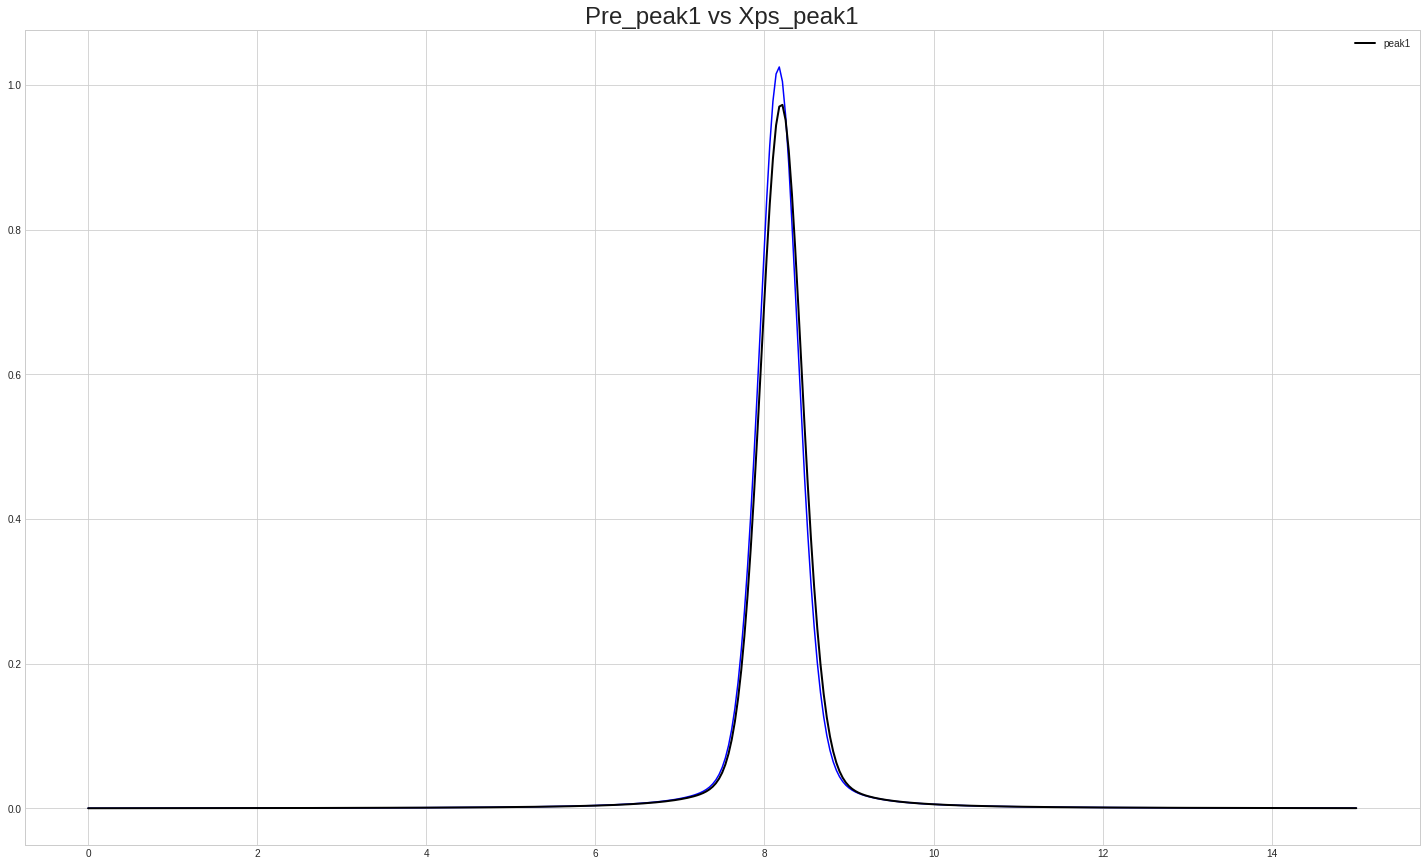

In [42]:
plt.figure(figsize = (25,15))
plt.plot(x,y(new_predict[1][2],new_predict[2][2],new_predict[3][2],x),color = 'blue')
plt.plot(x, (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()),color='black', label = "peak1", linewidth = 2)
plt.title("Pre_peak1 vs Xps_peak1", size = 24)
plt.legend()

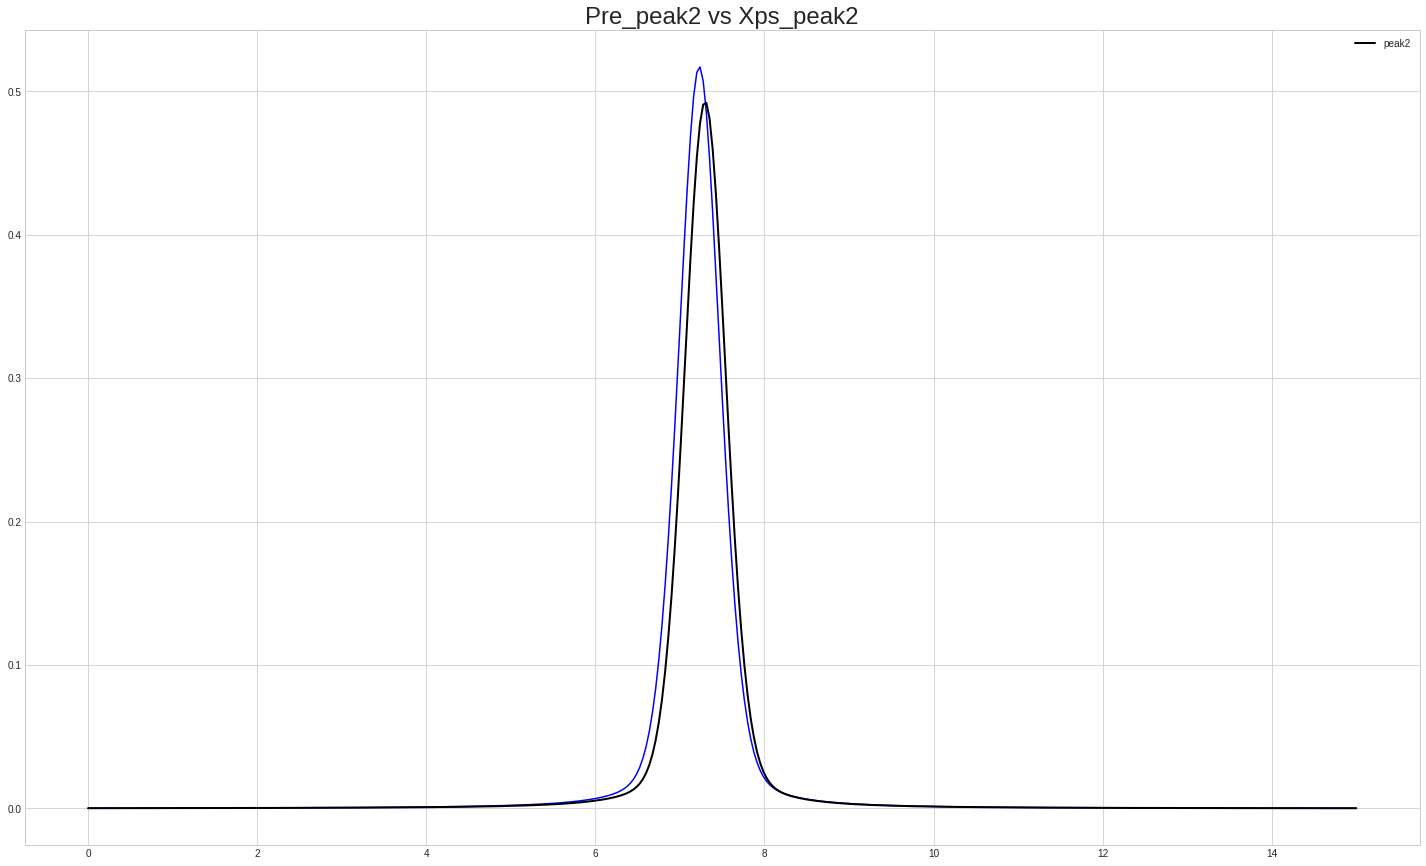

In [43]:
plt.figure(figsize = (25,15))
plt.plot(x,y(new_predict[1][1],new_predict[2][1],new_predict[3][1],x),color = 'blue')
plt.plot(x, (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()),color='black', label = "peak2", linewidth = 2)
plt.title("Pre_peak2 vs Xps_peak2", size = 24)
plt.legend()

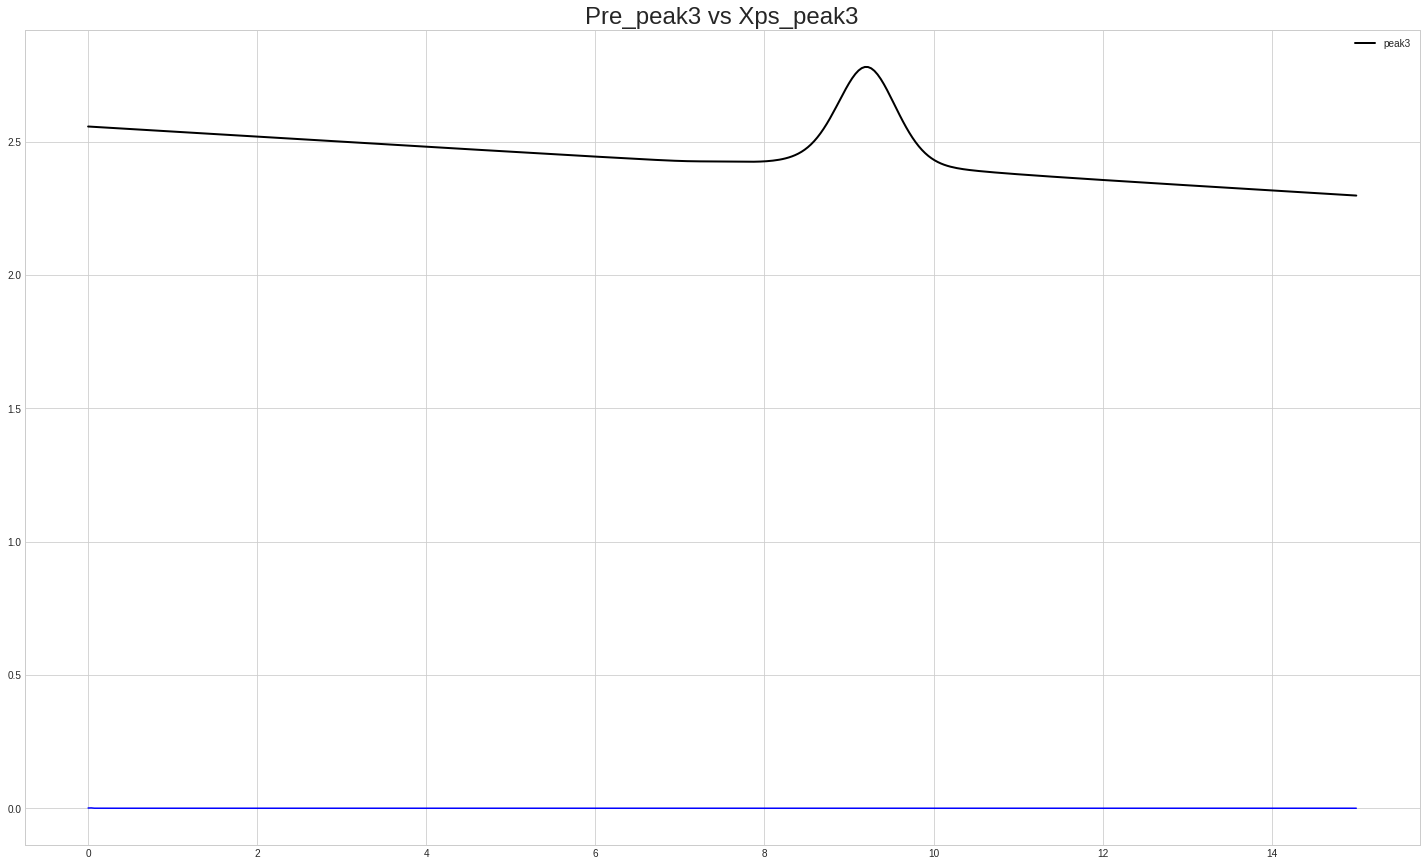

In [44]:
plt.figure(figsize = (25,15))
plt.plot(x,y(new_predict[1][0],new_predict[2][0],new_predict[3][0],x),color = 'blue')
plt.plot(x, (peak3[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()),color='black', label = 'peak3', linewidth = 2)
plt.title("Pre_peak3 vs Xps_peak3", size = 24)
plt.legend()

In [45]:
error_center_total=0
for i in range(test_center.shape[0]):
    error_center_total = error_center_total + (abs(prediction[1][i]-test_center[i]))
print('error_center_total = ',error_center_total)
error_center = error_center_total/test_center.shape[0]
print('error_center =  ',error_center)
print('\n')

error_width_total=0
for i in range(test_width.shape[0]):
    error_width_total = error_width_total + (abs(prediction[2][i]-test_width[i]))
print('error_width_total = ',error_width_total)
error_width = error_width_total/test_width.shape[0]
print('error_width =  ',error_width)
print('\n')

error_amp_total=0
for i in range(test_amp.shape[0]):
    error_amp_total = error_amp_total + (abs(prediction[3][i]-test_amp[i]))
print('error_amp_total = ',error_amp_total)
error_amp = error_amp_total/test_amp.shape[0]
print('error_amp =  ',error_amp)
print('\n')

error_center_total =  [1704.05209212 3288.6920626  1927.30801658]
error_center =   [0.0852026 0.1644346 0.0963654]


error_width_total =  [1080.66196074 1886.26284977 1508.63751932]
error_width =   [0.0540331  0.09431314 0.07543188]


error_amp_total =  [1167.73570918 1763.96972868 1475.56272861]
error_amp =   [0.05838679 0.08819849 0.07377814]




In [46]:
#바꾼거

# 결국 total_center,width,amp를 1층으로 함

In [47]:
# 수정할거

# 0.batchnormalization도 해보자
# 1.잔차연결
# 2. 데이터의 비율
# 3. 데이터의 양

In [48]:
# 확인할거

# 별 효과 없으면 다시 저장된 데이터 학습하기5로 모델 가져오기


In [49]:
#효과

# total_center,width,amp다 차이 없음 
